# Classification: Predicting Diabetes Based on Modifiable Factors

(max 2000 written words, not including citations)

Ensure that the following packages are installed before proceeding:

In [ ]:
# installation packages commented out for convenience.

#install.packages("tidyverse")
#install.packages("tidymodels")
#install.packages("gridExtra")
#install.packages("repr")
#install.packages("kknn")
#install.packages("cowplot")
#install.packages("shiny")

In [16]:
# set seed and load necessary packages

set.seed(1000)

library("tidyverse")
library("tidymodels")
library("gridExtra")
library("repr")
library("kknn")
library("cowplot")
library("shiny")

# Introduction

Diabetes mellitus is a serious disease causing severe health complications such as heart failure, with the main associated cause of death being coronary heart disease ([Das, 2014](https://doi.org/10.2174/1876524601407010005)). Our project attempts to predict the development of diabetes mellitus based on modifiable measures of health (eg. BMI), specifically in a population of adult female patients (aged 21 and above) of Pima Indian descent. Those of Indian descent often have higher rates of diabetes, suggesting a potential genetic predisposition to insulin resistance, however many other factors can play a role in the pathogenesis of diabetes. There are many known risk factors associated with this disorder, some of which include parental diabetes, obesity, and genetic components ([Das, 2014](https://doi.org/10.2174/1876524601407010005)). High prevalence of diabetes mellitus is not only a severe health issue, but also places a significant strain on the healthcare system ([Krishnamoorthy et al., 2022](https://doi.org/10.1007/s13300-022-01329-6)).

In order to predict the development of diabetes mellitus, we aim to train a K-nearest neighbors classifier on a dataset of Pima Indian female patients that were monitored longitudinally for the onset of diabetes. This `Diabetes Dataset` was uploaded to Kaggle by user Mehmet Akturk and sourced from the National Institute of Diabetes and Digestive and Kidney Diseases ([Smith et al., 1988](https://www.kaggle.com/datasets/mathchi/diabetes-data-set?fbclid=IwAR1DMzdJFDxoEqLDIZNTi3j7YJXTx_7BJwCl7sbn8syQKbQCnHfMtlsKH1E)). The study population consisted of adult female patients (at least 21 years of age) of Pima Indian heritage (n = 768), living near Phoenix, Arizona (USA). Researchers collected the following data:
 1. `Pregnancies`: Number of times pregnant
 2. `Glucose`: Plasma glucose concentration level at 2 hours in an oral glucose tolerance test (ie. glucose test, mg/dl)
 3. `BloodPressure`: Diastolic blood pressure (mmHg)
 4. `SkinThickness`: Triceps skin fold thickness (mm) (measure of body fat)
 5. `Insulin`: 2-Hour serum insulin (µU/mL)
 6. `BMI`: Body mass index (kg/m^2)
 7. `DiabetesPedigreeFunction`: Diabetes pedigree function (probability of diabetes based on family history) 
 8. `Age`: Age (years)
 9. `Outcome`: 0 = glucose test negative for diabetes 5+ years after data collection, 1 = glucose test positive for diabetes within 5 years of data collection

Diabetes was diagnosed by a plasma glucose concentration level greater than 200 mg/dl at 2 hours in an oral glucose tolerance test. All patients had a negative glucose test for diabetes at initial data collection ([Smith et al., 1988](https://www.kaggle.com/datasets/mathchi/diabetes-data-set?fbclid=IwAR1DMzdJFDxoEqLDIZNTi3j7YJXTx_7BJwCl7sbn8syQKbQCnHfMtlsKH1E)). In choosing parameters for our classifier, we have chosen to narrow our scope to the 5 modifiable and reversible variables in the dataset. This allows doctors to focus on modifying lifestyle factors within the patients' control.

**Research Question:**
Can our K-nearest neighbors classifier predict the onset of diabetes within a five-year time frame (`Outcome`) based on the 5 modifiable measures of health below with a high degree of accuracy, precision, and recall (>75%)?
 1. `Glucose`: Plasma glucose concentration level at 2 hours in an oral glucose tolerance test (ie. glucose test, mg/dl)
 2. `BloodPressure`: Diastolic blood pressure (mmHg)
 3. `SkinThickness`: Triceps skin fold thickness (mm) (measure of body fat)
 4. `Insulin`: 2-Hour serum insulin (µU/mL)
 5. `BMI`: Body mass index (kg/m^2)

# Methods

Our classifier was trained to predict diabetes development in the next 5 years (ie. pre-diabetes, `Outcome`) using K-nearest neighbors analysis. First, all non-modifiable/irreversible variables and `N/A` values were filtered out of our dataset. The filtered dataset (n = 392) was split into training (75% of the data) and testing (25% of the data) sets. The training set was used for exploratory analysis of the dataset: the mean of each variable in the non-diabetic and pre-diabetic groups were calculated, and the distributions of each variable were visualized. To select the appropriate value of K (number of neighbors) for our classifier, the training data was split into 10 subsets for cross-validation, and the cross-validation sets were used to tune the model. The accuracy estimates from K = 1 to K = 100 were visualized, and the optimal accuracy estimate was set at K = 21 for the classifier. The classifier was subsequently trained using the chosen K, with all the variables in the filtered dataset selected as parameters for classification of impending diabetes development (`Outcome`). The classifier was evaluated on the testing set, and the resulting predictions were compared to the actual outcome in the study as a confusion matrix. The proportion of true negative, false negative, true positive, and false positive predictions by our classifier was calculated from the confusion matrix data and visualized. Accuracy, precision, and recall of the classifier were all calculated from the confusion matrix to evaluate the quality of classifier predictions.

Data wrangling and cleaning was performed using the `tidyverse` package. Visualization was performed using the `tidyverse`, `cowplot`, and `gridExtra` packages. The dataset was split into training/testing sets, the classifier was built/trained, K was optimized, and the confusion matrix was created using the `tidymodels` package.

# Analysis and Results

## Importing and Tidying Data

Read in `diabetes.csv` from the `DSCI_100_Diabetes_Prediction` repository on GitHub.

In [17]:
# read in data
diabetes_dataset <- read_csv("https://raw.githubusercontent.com/hesoru/DSCI_100_Diabetes_Prediction/main/Dataset/diabetes.csv")

# view dataset variables and tibble dimensions
colnames(diabetes_dataset)
dim(diabetes_dataset)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Pregnancies"              "Glucose"                 
[3] "BloodPressure"            "SkinThickness"           
[5] "Insulin"                  "BMI"                     
[7] "DiabetesPedigreeFunction" "Age"                     
[9] "Outcome"

[1] 768   9

We will remove irreversible or non-modifiable variables from our classifier: `Pregnancies` (not a reversible variable), `DiabetesPedigreeFunction` (probability of diabetes based on family history), and `Age`.

The dataset has no `N/A` values, however some cells have a value equal to 0. `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, and `BMI` cannot have a reading of 0 in practice, so cells with a value of 0 in these columns will be treated as `N/A` and filtered out.

In [18]:
diabetes_dataset_filtered <- diabetes_dataset |>
    select(-Pregnancies, -DiabetesPedigreeFunction, -Age) |>
    filter(Glucose != 0, BloodPressure != 0, SkinThickness != 0, Insulin != 0, BMI != 0)

# view dataset variables and tibble dimensions
colnames(diabetes_dataset_filtered)
dim(diabetes_dataset_filtered)

[1] "Glucose"       "BloodPressure" "SkinThickness" "Insulin"      
[5] "BMI"           "Outcome"

[1] 392   6

Note that we have filtered out approximately half of the patients in our dataset, with a final sample size of n = 392.

## Splitting Data into Training and Testing Sets

Now that our data is tidy, we will split our data into training (75% of the data) and testing (25% of the data) sets, and convert the categorical variable `Outcome` into the factor data type.

In [19]:
set.seed(1000)

diabetes_dataset_filtered_split <- initial_split(data = diabetes_dataset_filtered,
                                                 prop = 0.75,
                                                 strata = Outcome)
training_filtered <- training(diabetes_dataset_filtered_split) |>
    mutate(Outcome = as_factor(Outcome))
testing_filtered <- testing(diabetes_dataset_filtered_split) |>
    mutate(Outcome = as_factor(Outcome))

## Exploration of Training Data

First, we will find the mean of each variable in the groups that did (`Outcome` = 1) and did not (`Outcome` = 0) develop diabetes within 5 years of data collection.

In [20]:
patient_means_by_outcome <- training_filtered |>
    group_by(Outcome) |>
    summarise(Patients = n(),
              Mean_Glucose = mean(Glucose),
              Mean_BP = mean(BloodPressure),
              Mean_SkinThickness = mean(SkinThickness),
              Mean_Insulin = mean(Insulin),
              Mean_BMI = mean(BMI))
patient_means_by_outcome

Outcome,Patients,Mean_Glucose,Mean_BP,Mean_SkinThickness,Mean_Insulin,Mean_BMI
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,196,111.7806,69.04592,27.00510,132.1735,31.98520
1,97,147.1856,74.73196,33.06186,207.3196,35.72062


**Table 1. Mean health measurements in Pima Indian female patients that did (`Outcome` = 1) and did not (`Outcome` = 0) develop diabetes within 5 years of data collection.** `Glucose` = plasma glucose concentration level at 2 hours in an oral glucose tolerance test (ie. glucose test, mg/dl), `BloodPressure` = diastolic blood pressure (mmHg), `SkinThickness` = triceps skin fold thickness (mm) (measure of body fat), `Insulin` = 2-Hour serum insulin (µU/mL), `BMI` = body mass index (kg/m^2).

**Interpretation:**
- 97/293 patients (33.1%) received a positive glucose test for diabetes (`Outcome` = 1) within 5 years of data collection. This implies a startling rate of diabetes development, however it is possible that some patients were already diabetic at data collection (false negatives). It is also likely that a large number of non-diabetics were filtered out when tidying our data.
- There is a large relative difference (at least 25%) in `Mean_Glucose` and `Mean_Insulin` between pre-diabetics and non-diabetics.

Next we plotted the distributions of each variable in the groups that did (pre-diabetic) and did not (non-diabetic) develop diabetes within 5 years of data collection.

In [21]:
options(repr.plot.width = 10, repr.plot.height = 7)

patient_distribution_glucose <- training_filtered |>
    ggplot(aes(x = Glucose)) +
    geom_histogram(bins = 10, binwidth = 5, aes(fill=Outcome)) +
    labs(x = "Glucose Plasma Concentration (mg/dl)",
         y = "Number of Patients") +
    theme(text = element_text(size = 10)) +
    theme(legend.position = "none")

patient_distribution_BP <- training_filtered |>
    ggplot(aes(x = BloodPressure)) +
    geom_histogram(bins = 10, binwidth = 4, aes(fill=Outcome)) +
    labs(x = "Diastolic Blood Pressure (mmHg)",
         y = "Number of Patients") +
    theme(text = element_text(size = 10)) +
    theme(legend.position = "none")

patient_distribution_SkinThickness <- training_filtered |>
    ggplot(aes(x = SkinThickness)) +
    geom_histogram(bins = 10, binwidth = 2, aes(fill=Outcome)) +
    labs(x = "Tricep Skin Thickness (mm)",
         y = "Number of Patients") +
    theme(text = element_text(size = 10)) +
    theme(legend.position = "none")

patient_distribution_Insulin <- training_filtered |>
    ggplot(aes(x = Insulin)) +
    geom_histogram(bins = 10, binwidth = 25, aes(fill=Outcome)) +
    labs(x = "2-Hour Serum Insulin (µU/mL)",
         y = "Number of Patients") +
    theme(text = element_text(size = 10)) +
    theme(legend.position = "none")

patient_distribution_BMI <- training_filtered |>
    ggplot(aes(x = BMI)) +
    geom_histogram(bins = 10, binwidth = 2, aes(fill=Outcome)) +
    labs(x = "Body Mass Index (kg/m^2)",
         y = "Number of Patients") +
    theme(text = element_text(size = 10)) +
    theme(legend.position = "none")

# will grab legend from this plot - plot will remain unvisualized
outcome_legend <- training_filtered |>
    ggplot(aes(x = BMI)) +
    geom_histogram(bins = 10, binwidth = 2, aes(fill=Outcome)) +
    labs(x = "Body Mass Index (kg/m^2)",
         y = "Number of Patients") +
    scale_fill_discrete(labels=c('Non-Diabetic', 'Pre-Diabetic')) +
    theme(text = element_text(size = 10)) 
# grab legend
legend <- cowplot::get_legend(outcome_legend)

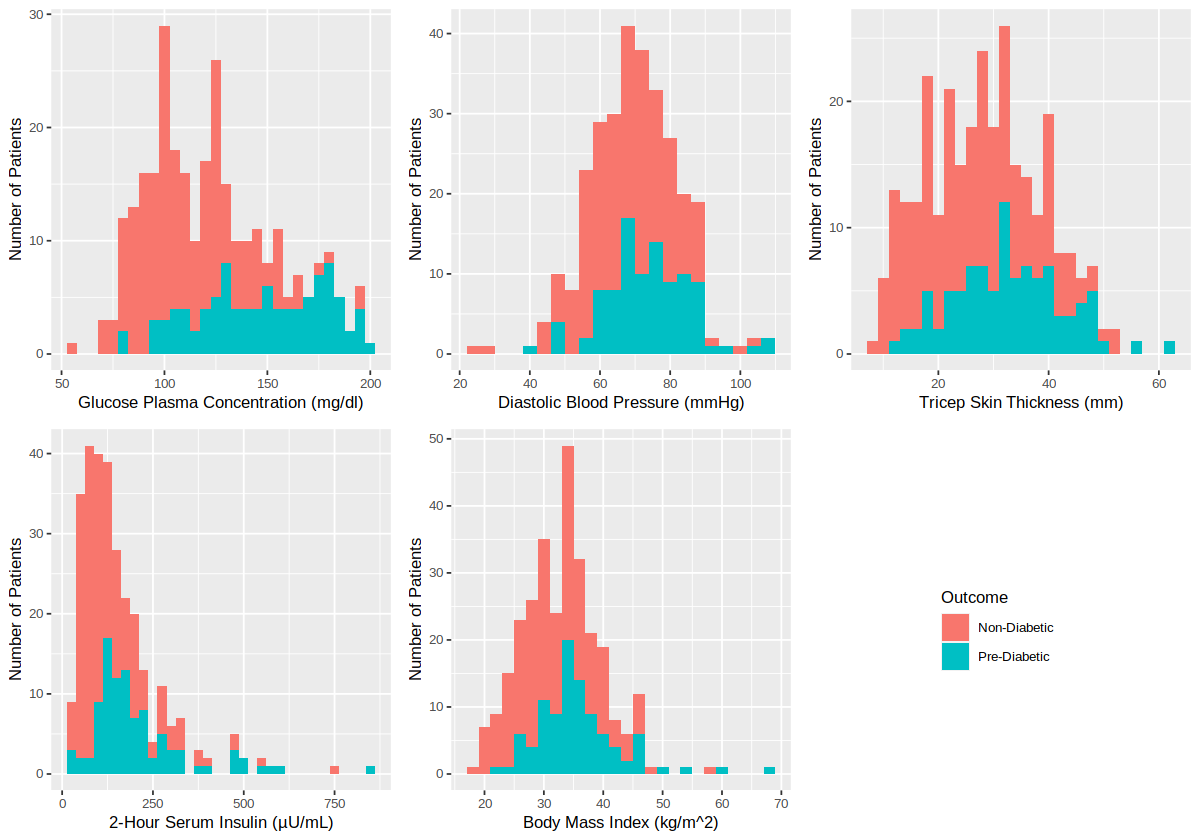

In [22]:
# plot all distributions on a grid
grid.arrange(patient_distribution_glucose,
             patient_distribution_BP,
             patient_distribution_SkinThickness,
             patient_distribution_Insulin,
             patient_distribution_BMI,
             legend,
             ncol=3)

**Figure 1. Distributions of health measurements in Pima Indian female patients that did (pre-diabetic) and did not (non-diabetic) develop diabetes within 5 years of data collection.** 

**Interpretation:**
- The distributions for glucose plasma concentration and 2-hour serum insulin appear to have different centers for non-diabetics and pre-diabetics. This is consistent with **Table 1**, which shows that the means for glucose plasma concentration and 2-hour serum insulin are significantly different between non-diabetics and pre-diabetics.

## Selecting K for the Classifier

First we will set up the model recipe, K-nearest neighbor classification specifications, split the training data into 10 subsets for cross-validation, and set the K-values to test. We chose to test our classifier from K = 1 to K = 100.

In [23]:
set.seed(1000)

knn_recipe <- recipe(Outcome ~ ., data = training_filtered) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

vfold <- vfold_cv(training_filtered, v = 10, strata = Outcome)

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

Now we will calculate and visualize the accuracy of our model from K = 1 to K = 100.

In [24]:
knn_results <- workflow() |>
  add_recipe(knn_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = vfold, grid = k_vals) |>
  collect_metrics() 
                 
accuracies <- knn_results |>
    filter(.metric =="accuracy")

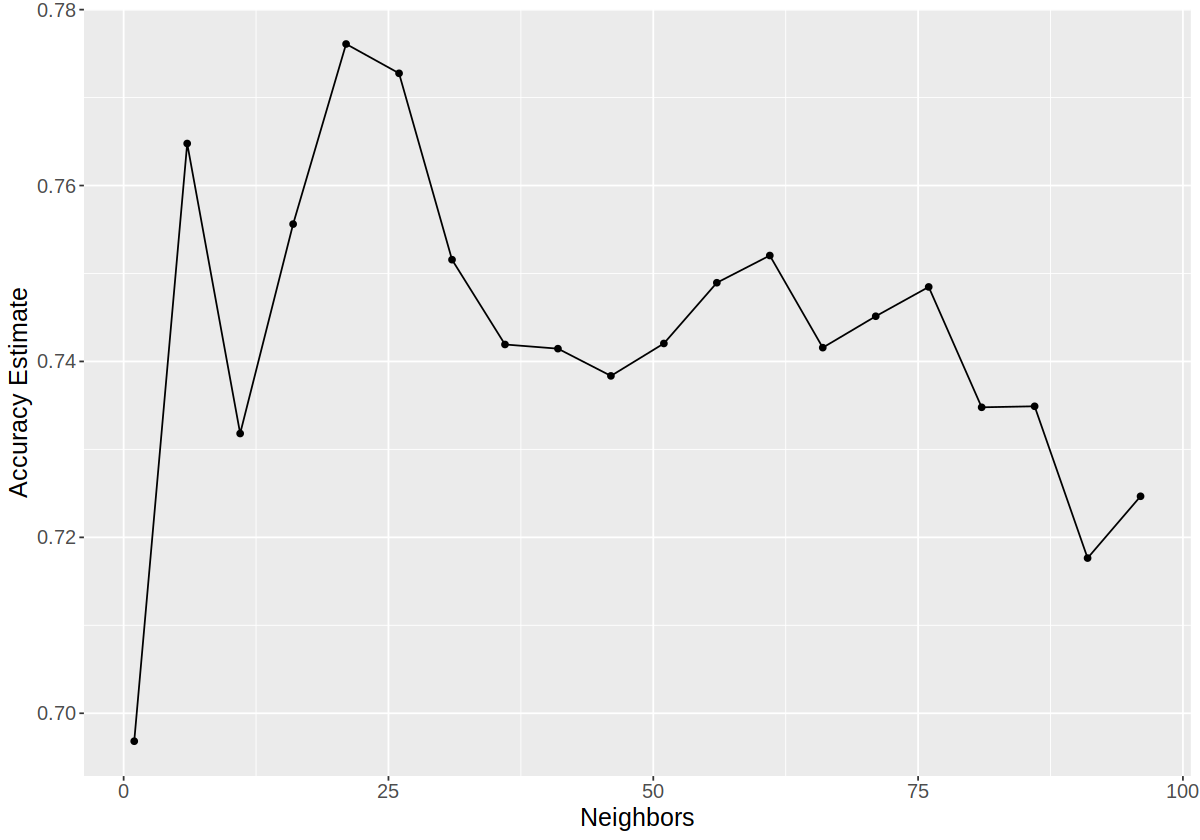

In [25]:
cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 15))
cross_val_plot

**Figure 2. Estimated accuracy of model plotted against the number of neighbors for K-nearest neighbors classification.**

Setting the number of neighbors to K = 21 provides the highest estimated accuracy, thus we will move forward using this K-value for the classification.

## Training the Classifier

Now we will combine our recipe, K-nearest neighbor classification specifications (with our newly determined K), and training data to train our model.

In [26]:
set.seed(1000)

# our knn_recipe was defined previously when tuning the classifier

mnist_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 21) |> 
    set_engine("kknn") |>
    set_mode("classification")

mnist_fit <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(mnist_spec) |>
    fit(data = training_filtered)

## Evaluating the Classifier's Performance

We will build a confusion matrix based off our classifier's labelling.

In [27]:
set.seed(1000)

mnist_predictions <- predict(mnist_fit, testing_filtered) |>
    bind_cols(testing_filtered)

mnist_metrics <- mnist_predictions |>
    metrics(truth = Outcome, estimate = .pred_class) |>
    filter(.metric == "accuracy")

mnist_conf_mat <- mnist_predictions |>
    conf_mat(truth = Outcome, estimate = .pred_class)
mnist_conf_mat

          Truth
Prediction  0  1
         0 61 19
         1  5 14

**Table 2. Confusion matrix comparing classifier predictions (Prediction) against actual results (Truth).** Predictions by our classifier were assessed after classifying our testing dataset (n = 99) of adult Pima Indian female patients. 

The confusion matrix above can also be written in terms of the number of true positive, true negative, false positive, and false negative results by the classifier.

In [28]:
conf_mat_table <- data.frame(T_or_F = c("True", "False", "True", "False"),
                             Neg_or_Pos = c("Negative (Non-Diabetic)", "Negative (Non-Diabetic)",
                                            "Positive (Pre-Diabetic)", "Positive (Pre-Diabetic)"),
                             Count = c(61, 19, 14, 5)) |>
                             mutate(Proportion = Count/99)

Which can be visualized below.

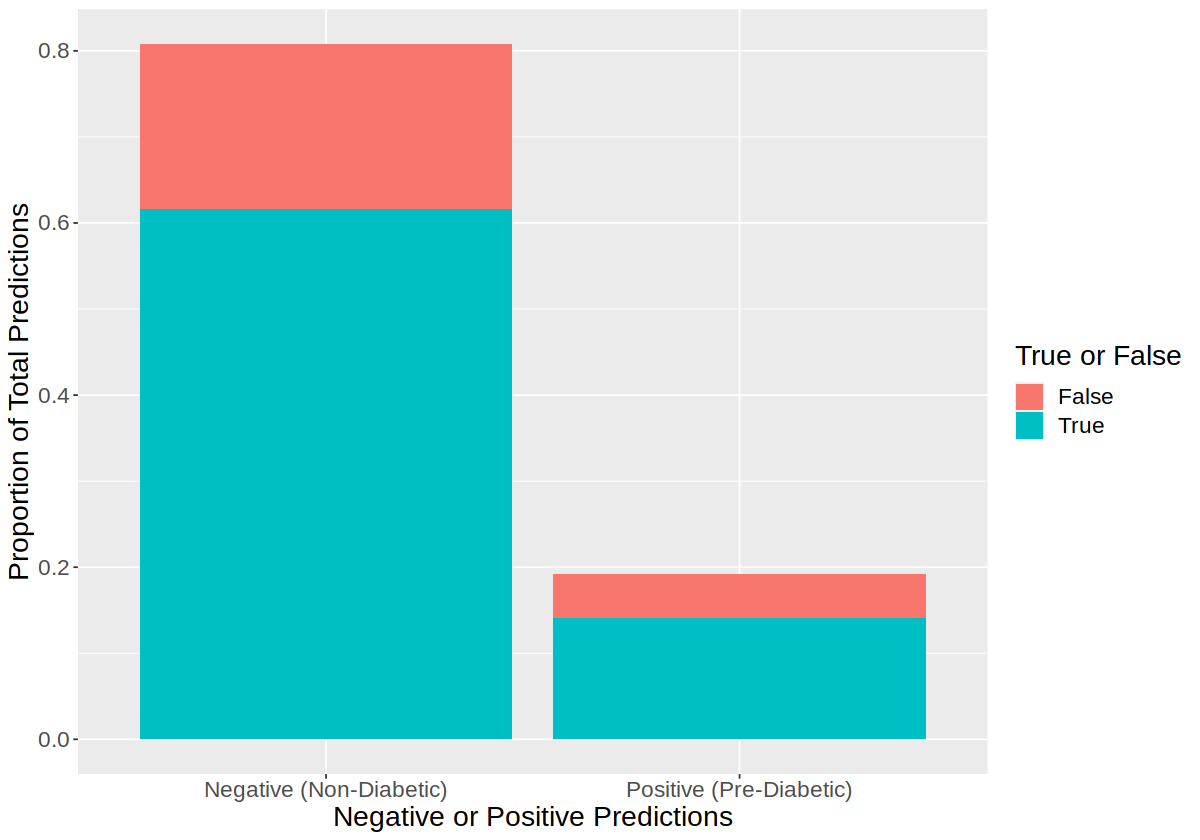

In [29]:
mnist_plot <- ggplot(conf_mat_table, aes(x = Neg_or_Pos, y = Proportion, fill = T_or_F)) +
       geom_bar(stat = "identity") +
       labs(x = "Negative or Positive Predictions",
            y = "Proportion of Total Predictions",
            fill = "True or False") +
       theme(text = element_text(size = 17))
mnist_plot

**Figure 3. Evaluation of K-nearest neighbor classifier predictions.** The proportion of true negative, false negative, true positive, and false positive predictions by our classifier was determined after classifying our testing dataset (n = 99) of adult Pima Indian female patients. 

Additionally, we can calculate accuracy, precision, and recall of our classifier using the data from our confusion matrix.

## $ \textrm{accuracy} = \frac{\textrm{number of correct predictions}}{\textrm{total number of predictions}} = \frac{\textrm{61 + 14}}{\textrm{61 + 19 + 5 + 14}} = 0.7576 $

## $ \textrm{precision} = \frac{\textrm{number of correct positive predictions}}{\textrm{total number of positive predictions}} = \frac{\textrm{14}}{\textrm{14 + 5}} = 0.7368 $

## $ \textrm{recall} = \frac{\textrm{number of correct positive predictions}}{\textrm{total number of positive test set predictions}} = \frac{\textrm{14}}{\textrm{14 + 19}} = 0.4242 $

# Discussion

This study has found that a k-nearest-neighbor classification algorithm trained on the 5 selected predictors: glucose plasma concentration, diastolic blood pressure, triceps skin thickness, 2-hour serum insulin and body mass index, can achieve a relatively high (>75%) accuracy on classifying pre-diabetic patients, as early as 5 years before diagnosis.

This finding is expected. It was clear in the data exploration that there exists an observable difference in the selected predictors between non-diabetic and pre-diabetic patients. Although the statistical significance of these differences was not tested for, it was hypothesized that such differences are enough to facilitate a classification algorithm. 

The relatively high accuracy is also supported by a number of past studies which suggested an individual correlation between the selected predictors and diabetes. [Edeoga et al](https://doi.org/10.1016/j.jdiacomp.2017.07.019). suggested a positive correlation between blood glucose and blood pressure, and blood pressure was successfully used to predict pre-diabetic patients among initially normoglycemic samples. Mbanya et al. also agrees with this correlation by mentioning high blood pressure as a "major driver" of diabetes. Skin thickness can be used to predict body fat percentage, and the accuracy of such method has been confirmed ([Jayawardena et al., 2020](https://doi.org/10.1016/j.dsx.2020.02.003)). Body fat percentage can then be used as a predictor of diabetes. Singh et al. and Nassr et al. have suggested a high practicality of this method. Although both of the studies focused primarily on gestational diabetes, the correlation between body fat percentage and diabetes is apparent. Similarly, high levels of fasting insulin and true insulin are strongly associated with pre-diabetes([Quan et al., 2021](https://doi.org/10.1007/s13410-021-00983-z)); [He et al.](https://doi.org/10.1111/jdi.13777) suggested that body mass index is a predictor of whether a pre-diabetes patient converts to diabetes.

The findings of this study combine the results of past studies in a practical case. These correlations are further confirmed and the effectiveness of these predictors combined is investigated. Unlike diabetes which is incurable at the time of writing, pre-diabetic patients can be saved from converting to diabetes if the correct treatment can be given in time. This study examined the knn-classification methods for diagnosing pre-diabetes, which can potentially be used to provide valuable extra time for pre-diabetic patients to be treated and to adapt to a different lifestyle. Furthermore, this study also reveals some possible limitations in practical usage, which can be the direction of further studies: despite the overall accuracy being acceptable, the recall of this algorithm is low, at 42.42%, showing that over half of the pre-diabetic patients are being diagnosed as not being pre-diabetic. Depending on the actual requirements which differ between scenarios, a low recall can lead to patients who need to be treated or warned being neglected. To address this issue, we suggest that either this algorithm to be modified to increase recall, or to use this algorithm in conjunction with other analyses for a more accurate diagnosis of pre-diabetic patients. Unfortunately, this study does not intend to further optimize this algorithm, leaving it as a future topic. 

As this study is focused on identifying pre-diabetic patients among the female Pima Indian population of individuals above the age of 21, the data is not representative of the world-wide population of pre-diabetics. Due to this very specific sample population, it should be noted that certain biases may exist and should be taken into account when using the results of this analysis for further studies. However, despite the biased sample, the analysis still gives an insight in identifying pre-diabetics and serves as a base for future studies. Obtaining samples from a wider population will allow for a more generalized algorithm to be made which would assist in the identification of pre-diabetics around the world.

# References

Das, R. N. (2014). Determinants of diabetes mellitus in the Pima Indian mothers and Indian Medical Students. *The Open Diabetes Journal*, 7(1), 5–13. https://doi.org/10.2174/1876524601407010005

Edeoga, C., Owei, I., Siwakoti, K., Umekwe, N., Ceesay, F., Wan, J., &amp; Dagogo-Jack, S. (2017). Relationships between blood pressure and blood glucose among offspring of parents with type 2 diabetes: Prediction of incident dysglycemia in a biracial cohort. *Journal of Diabetes and Its Complications*, 31(11), 1580–1586. https://doi.org/10.1016/j.jdiacomp.2017.07.019 

He, Y., Feng, Y., Shi, J., Tang, H., Chen, L., &amp; Lou, Q. (2022). Β‐cell function and body mass index are predictors of exercise response in elderly patients with Prediabetes. *Journal of Diabetes Investigation*, 13(7), 1253–1261. https://doi.org/10.1111/jdi.13777 

Jayawardena, R., Waniganayake, Y. C., Abhayaratna, S. A., &amp; Ranasinghe, P. (2020). Prediction of body fat in Sri Lankan adults: Development and validation of a skinfold thickness equation. *Diabetes & Metabolic Syndrome: Clinical Research & Reviews*, 14(2), 147–150. https://doi.org/10.1016/j.dsx.2020.02.003 

Krishnamoorthy, Y., Rajaa, S., Verma, M., Kakkar, R., & Kalra, S. (2022). Spatial patterns and determinants of diabetes mellitus in Indian adult population: A secondary data analysis from nationally representative surveys. *Diabetes Therapy*, 14(1), 63–75. https://doi.org/10.1007/s13300-022-01329-6

Mbanya, V. N., Mbanya, J., Kufe, C., &amp; Kengne, A. P. (2016). Effects of single and multiple blood pressure measurement strategies on&nbsp;the prediction of prevalent screen‐detected diabetes mellitus: A&nbsp;population‐based survey. *The Journal of Clinical Hypertension*, 18(9), 864–870. https://doi.org/10.1111/jch.12774 

Nassr, A. A., Shazly, S. A., Trinidad, M. C., El-Nashar, S. A., Marroquin, A. M., &amp; Brost, B. C. (2018). Body fat index: A novel alternative to body mass index for prediction of gestational diabetes and hypertensive disorders in pregnancy. *European Journal of Obstetrics & Gynecology and Reproductive Biology*, 228, 243–248. https://doi.org/10.1016/j.ejogrb.2018.07.001 

Quan, H., Fang, T., Lin, L., Lin, L., Ou, Q., Zhang, H., Chen, K., &amp; Zhou, Z. (2021). Effects of fasting proinsulin/fasting insulin, proinsulin/insulin, vitamin D3, and waistline on diabetes prediction among the Chinese Han population. *International Journal of Diabetes in Developing Countries*, 42(2), 218–226. https://doi.org/10.1007/s13410-021-00983-z 

Singh, D., Mittal, P., Bachani, S., Mukherjee, B., Mittal, M. K., &amp; Suri, J. (2023). Ultrasonographic assessment of body fat index for prediction of gestational diabetes mellitus and neonatal complications. *Journal of Obstetrics and Gynaecology Canada*, 45(11), 102177. https://doi.org/10.1016/j.jogc.2023.04.026 

Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. *In Proceedings of the Symposium on Computer Applications and Medical Care*, 261-265. https://www.kaggle.com/datasets/mathchi/diabetes-data-set?fbclid=IwAR1DMzdJFDxoEqLDIZNTi3j7YJXTx_7BJwCl7sbn8syQKbQCnHfMtlsKH1E